In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df['Duration']=pd.to_numeric(df['Duration'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

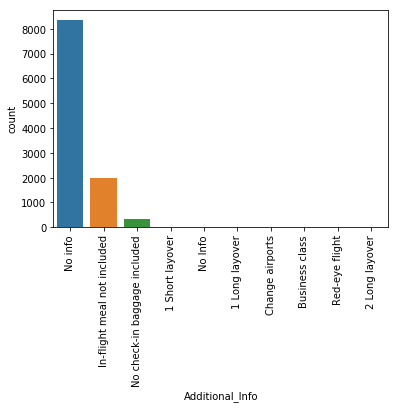

In [7]:
plot=plt.figure()
sns.countplot('Additional_Info',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

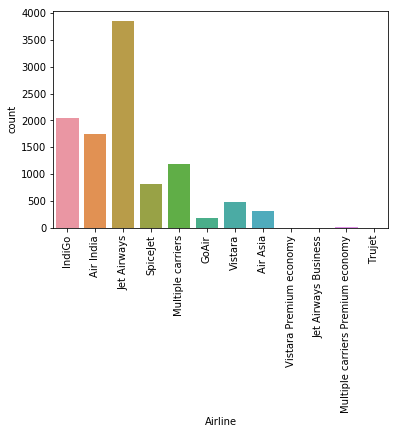

In [8]:
plot=plt.figure()
sns.countplot('Airline',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

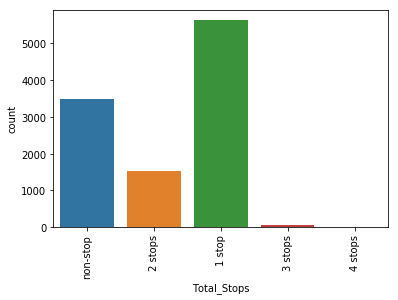

In [9]:
plot=plt.figure()
sns.countplot('Total_Stops',data=df)
plt.xticks(rotation=90)

In [10]:
df['Additional_Info']=df['Additional_Info'].str.replace('No info','No Info')

In [11]:
df['Airline']=df['Airline'].str.replace('Jet Airways Business','Jet Airways').str.replace('Vistara Premium economy','Vistara').str.replace('Multiple carriers Premium economy','Multiple carriers')

In [12]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.time
df['weekday']=df[['Date_of_Journey']].apply(lambda x:x.dt.day_name())
df["month"] = df['Date_of_Journey'].map(lambda x: x.month_name())
df['Dep_Time']=df['Dep_Time'].apply(lambda x:x.hour)
df.drop(['Route','Arrival_Time','Date_of_Journey'],axis=1,inplace=True)
df['Dep_Time']=pd.to_numeric(df['Dep_Time'])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_mod = ['Airline','Source','Destination','Additional_Info','Total_Stops','weekday','month']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
x=df.drop('Price',axis=1)
y=df['Price']

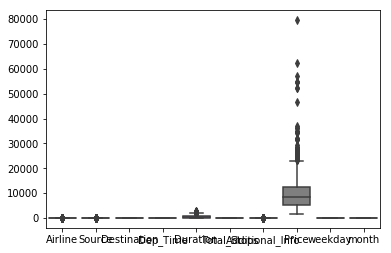

In [13]:
sns.boxplot(data=df)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 0, 'Relative Importance')

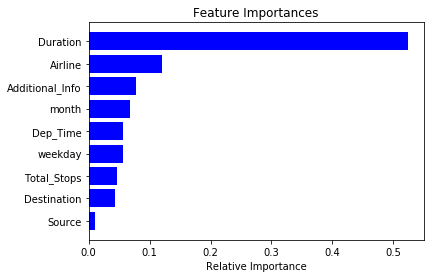

In [16]:
rfg.fit(x_train,y_train)
features=x.columns
importances = rfg.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [17]:
predictions=rfg.predict(x_test)

In [18]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score',metrics.r2_score(y_test,predictions))

MAE: 1045.5171841923482
MSE: 4579019.654204237
RMSE: 2139.8644008918504
r2_score 0.7892178319375964


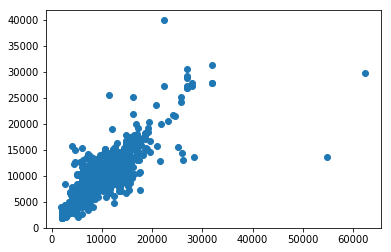

In [19]:
plt.scatter(y_test,predictions)